# Análise de Séries Temporais com Facebook Prophet e Comparação com Arima

In [34]:
%pip install prophet pmdarima

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\josaf\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [35]:
# Importando as bibliotecas
import pandas as pd
from prophet import Prophet
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [36]:
# Carregando os dados
df = pd.read_csv('../../datasets/vendas.csv')
df['data']= pd.to_datetime(df['data'])
df = df.sort_values('data')

In [37]:
df

,data,vendas
0,2022-01-01,207.97
1,2022-01-02,199.37
2,2022-01-03,212.09
3,2022-01-04,226.14
4,2022-01-05,200.71
...,...,...
725,2023-12-27,493.53
726,2023-12-28,497.49
727,2023-12-29,503.36
728,2023-12-30,490.98


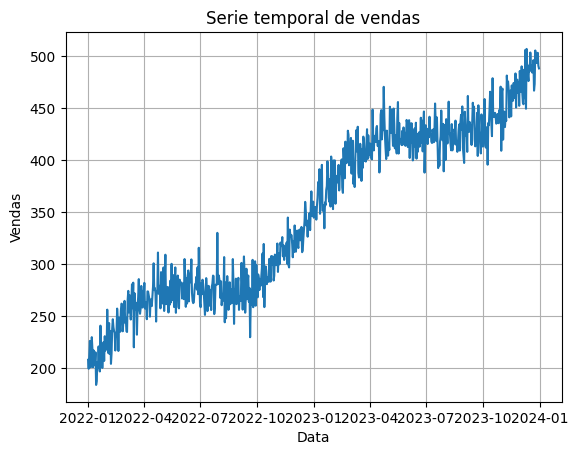

In [38]:
# Visualização Inicial
plt.plot(df['data'], df['vendas'])
plt.title('Serie temporal de vendas')
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.grid(True)
plt.show()

In [39]:
# Separar treino e teste
train = df[:-30]
test = df[-30:]

In [40]:
# Treinando o modelo Prophet
prophet_df = train.rename(columns={'data':'ds', 'vendas':'y'})
modelo_prophet = Prophet()
modelo_prophet.fit(prophet_df)

22:58:30 - cmdstanpy - INFO - Chain [1] start processing
22:58:30 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
# Previsão
futuro = modelo_prophet.make_future_dataframe(periods=30)
forecast = modelo_prophet.predict(futuro)

In [42]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,205.426270,186.793637,224.211286,205.426270,205.426270,0.650825,0.650825,0.650825,0.650825,0.650825,0.650825,0.0,0.0,0.0,206.077095
1,2022-01-02,206.110233,188.901290,227.286087,206.110233,206.110233,1.338640,1.338640,1.338640,1.338640,1.338640,1.338640,0.0,0.0,0.0,207.448873
2,2022-01-03,206.794196,184.395180,222.267479,206.794196,206.794196,-2.657021,-2.657021,-2.657021,-2.657021,-2.657021,-2.657021,0.0,0.0,0.0,204.137175
3,2022-01-04,207.478160,188.358843,226.433085,207.478160,207.478160,0.372291,0.372291,0.372291,0.372291,0.372291,0.372291,0.0,0.0,0.0,207.850451
4,2022-01-05,208.162123,188.063390,226.114187,208.162123,208.162123,-1.258199,-1.258199,-1.258199,-1.258199,-1.258199,-1.258199,0.0,0.0,0.0,206.903924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27,460.309056,439.139111,479.607305,458.676012,462.213495,-1.258199,-1.258199,-1.258199,-1.258199,-1.258199,-1.258199,0.0,0.0,0.0,459.050857
726,2023-12-28,460.542768,442.629875,481.531021,458.749745,462.557442,1.870730,1.870730,1.870730,1.870730,1.870730,1.870730,0.0,0.0,0.0,462.413497
727,2023-12-29,460.776479,440.331464,479.575149,458.872168,462.884258,-0.317266,-0.317266,-0.317266,-0.317266,-0.317266,-0.317266,0.0,0.0,0.0,460.459213
728,2023-12-30,461.010190,442.663838,481.600247,458.991113,463.225667,0.650825,0.650825,0.650825,0.650825,0.650825,0.650825,0.0,0.0,0.0,461.661015


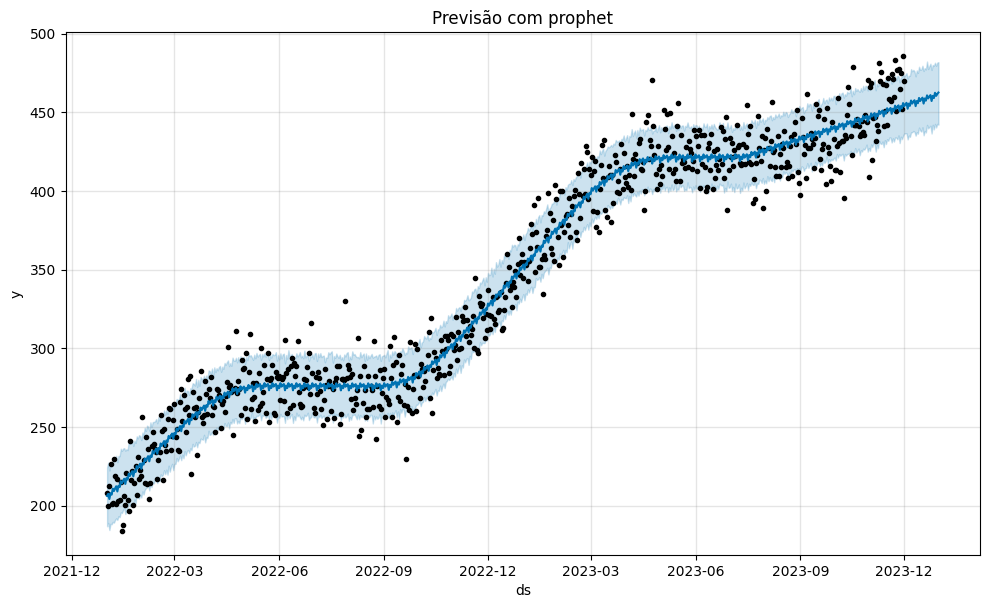

In [43]:
# Visualização
modelo_prophet.plot(forecast)
plt.title("Previsão com prophet")
plt.show()

In [44]:
test

,data,vendas
700,2023-12-02,465.86
701,2023-12-03,490.31
702,2023-12-04,464.88
703,2023-12-05,455.19
704,2023-12-06,453.85
705,2023-12-07,487.17
706,2023-12-08,459.76
707,2023-12-09,506.18
708,2023-12-10,449.52
709,2023-12-11,507.09


In [45]:
# Avaliação
y_pred_prophet = forecast[['ds', 'yhat']].set_index('ds').loc[test['data'], 'yhat'].values
mae_prophet = mean_absolute_error(test['vendas'], y_pred_prophet)
print(f"MAE prophet: {mae_prophet:.2f}")

MAE prophet: 27.10


In [46]:
# Modelo Arima
arima_modelo = auto_arima(train['vendas'], seasonal=True, m=7,trace=False)
y_pred_arima = arima_modelo.predict(n_periods=30)
mae_arima = mean_absolute_error(test['vendas'], y_pred_arima)
print(f'ME ARIMA: {mae_arima:.2f}')

ME ARIMA: 15.15


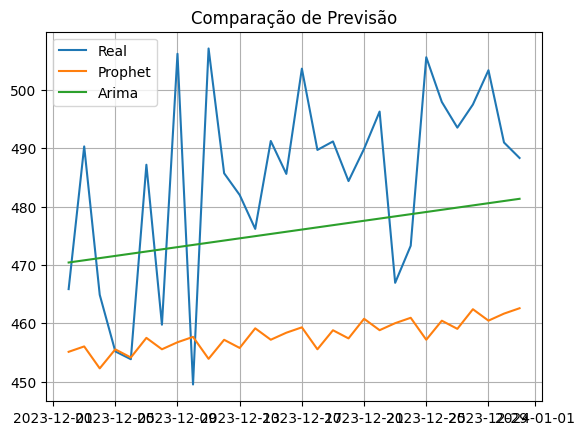

In [47]:
# Comparação Visual
plt.plot(test['data'], test['vendas'], label="Real")
plt.plot(test['data'], y_pred_prophet, label='Prophet')
plt.plot(test['data'], y_pred_arima, label='Arima')
plt.legend()
plt.title("Comparação de Previsão")
plt.grid(True)
plt.show()